In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import re

In [2]:
dataset_column = ['en_curid', 'name', 'numlangs', 'birthcity', 'birthstate', 'countryName', 'countryCode',
             'countryCode3', 'LAT', 'LON', 'continentName', 'birthyear', 'gender', 'occupation',
             'industry', 'domain', 'TotalPageViews', 'L_star', 'StdDevPageViews', 'PageViewsEnglish',
             'PageViewsNonEnglish', 'AverageViews', 'HPI']

df = pd.read_csv("../data/pantheon.tsv",
                     header=0,
                     sep='\t',
                     names=dataset_column)

#df = df.sample(n=10000, random_state=1)

print("DATASET IMPORTED.")

DATASET IMPORTED.


In [3]:
# To apply PCA, we transform string values into numerical values

string_fields = {
    'birthcity': {},
    'birthstate': {},
    'countryName': {},
    'countryCode': {},
    'countryCode3': {},
    'continentName': {},
    'domain': {}
}

for field_name, field_dict in string_fields.items():
    i = 0
    for elem in df[field_name]:
        if elem not in field_dict:
            field_dict[elem] = i
            i+=1
    df[field_name].replace(field_dict, inplace=True)
    
    
#replace lat and lon with numerical values or 0 if are Nan
def coo_replacement(val):
    if not math.isnan(val):
        return float(val)
    else:
        return 0
    
#replace birthyear with numerical values
def birthyear_replacement(val):
    if "s" in str(val):
        return int(val.replace("s", ""))
    elif "?" in str(val):
        return int(val.replace("?", ""))
    elif "Unknown" in str(val):
        return -10000
    else:
        return int(val)
        
df.LAT = df.LAT.apply(coo_replacement)
df.LON = df.LON.apply(coo_replacement)
df.birthyear = df.birthyear.apply(birthyear_replacement)
    
print("Database with string converted to int\n")
    
print(df[['name', 'birthcity', 'birthstate', 'countryName', 'countryCode',
             'countryCode3', 'LAT', 'LON', 'continentName','birthyear', 'domain', 'HPI']])

Database with string converted to int

                         name  birthcity  birthstate  countryName  \
0             Abraham Lincoln          0           0            0   
1                   Aristotle          1           1            1   
2                    Ayn Rand          2           1            2   
3                Andre Agassi          3           2            0   
4               Aldous Huxley          4           1            3   
...                       ...        ...         ...          ...   
11336                 Rebecca         14           1            8   
11337               Mindaugas       3248           1           76   
11338  Gediminas of Lithuania         14           1            8   
11339           Eric Hobsbawm        130           1           13   
11340   Nikolai Chernyshevsky       3075           1            2   

       countryCode  countryCode3        LAT         LON  continentName  \
0                0             0  37.571111  -85.738611   

In [4]:
#PCA

geo_features = ['birthcity', 'birthstate', 'countryName', 'countryCode',
             'countryCode3', 'continentName', 'LAT', 'LON']
# Separating out the features
x = df.loc[:, geo_features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
geo_components = pca.fit_transform(x)
geo_df = pd.DataFrame(data=geo_components, 
                           columns=['geo_x', 'geo_y'])
print(geo_df)

          geo_x     geo_y
0     -1.809730  0.331948
1     -1.114928 -1.054706
2     -1.314095 -1.345124
3     -1.948748  0.849457
4     -1.281271 -0.853841
...         ...       ...
11336 -0.118006 -0.317922
11337  1.152731 -0.250046
11338 -0.118006 -0.317922
11339  0.267508 -1.168667
11340 -0.735792 -1.155414

[11341 rows x 2 columns]


PCA applied to geographic fields



Text(0, 0.5, 'HPI')

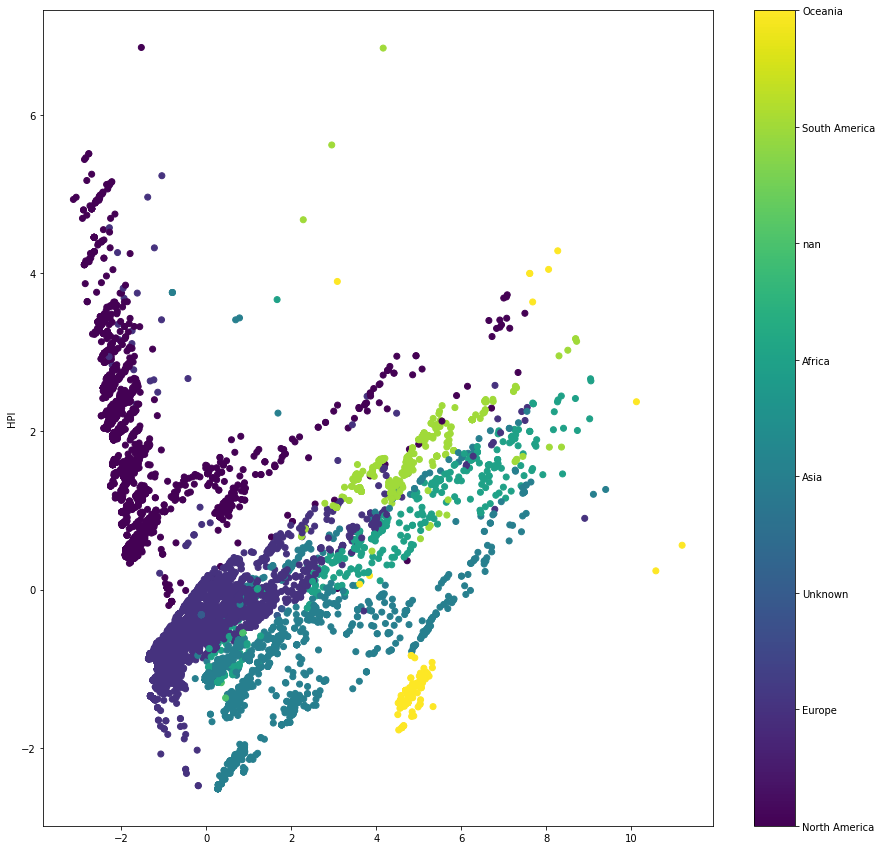

In [5]:
print("PCA applied to geographic fields\n")

def fmt(x, pos):
    return [key  for (key, value) in string_fields['continentName'].items() if value == x][0]

fig, ax = plt.subplots(figsize=(15,15))
sc = ax.scatter(geo_df.geo_x, geo_df.geo_y, c=df.continentName, cmap='viridis')
fig.colorbar(sc, format=ticker.FuncFormatter(fmt));
plt.ylabel("HPI")


In [6]:
#TSNE

geo_features = ['birthcity', 'birthstate', 'countryName', 'countryCode',
             'countryCode3', 'continentName', 'LAT', 'LON']
# Separating out the features
x = df.loc[:, geo_features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

tsne = TSNE(n_components=2)
geo_components = tsne.fit_transform(x)
geo_df = pd.DataFrame(data=geo_components, 
                           columns=['geo_x', 'geo_y'])

TSNE applied to geographic fields



Text(0, 0.5, 'HPI')

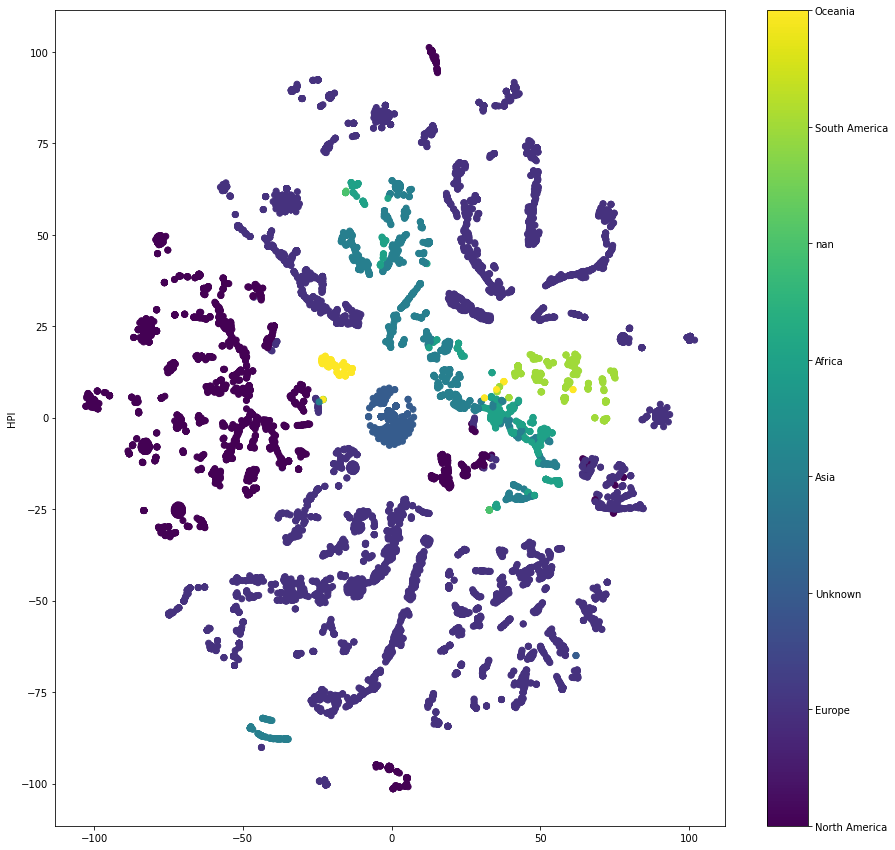

In [7]:
print("TSNE applied to geographic fields\n")

def fmt_con(x, pos):
    return [key  for (key, value) in string_fields['continentName'].items() if value == x][0]

def fmt_inst(x, pos):
    foo = [key  for (key, value) in string_fields['domain'].items() if value == x]
    if len(foo) > 0:
        return [key  for (key, value) in string_fields['domain'].items() if value == x][0]
    else:
        return None

fig, ax = plt.subplots(figsize=(15,15))
sc = ax.scatter(geo_df.geo_x, geo_df.geo_y, c=df.continentName, cmap='viridis')
fig.colorbar(sc, format=ticker.FuncFormatter(fmt_con));
plt.ylabel("HPI")

# LAT AND LON

In this section, we visualize planisphere using Lat and Lon like cartesian coordinates

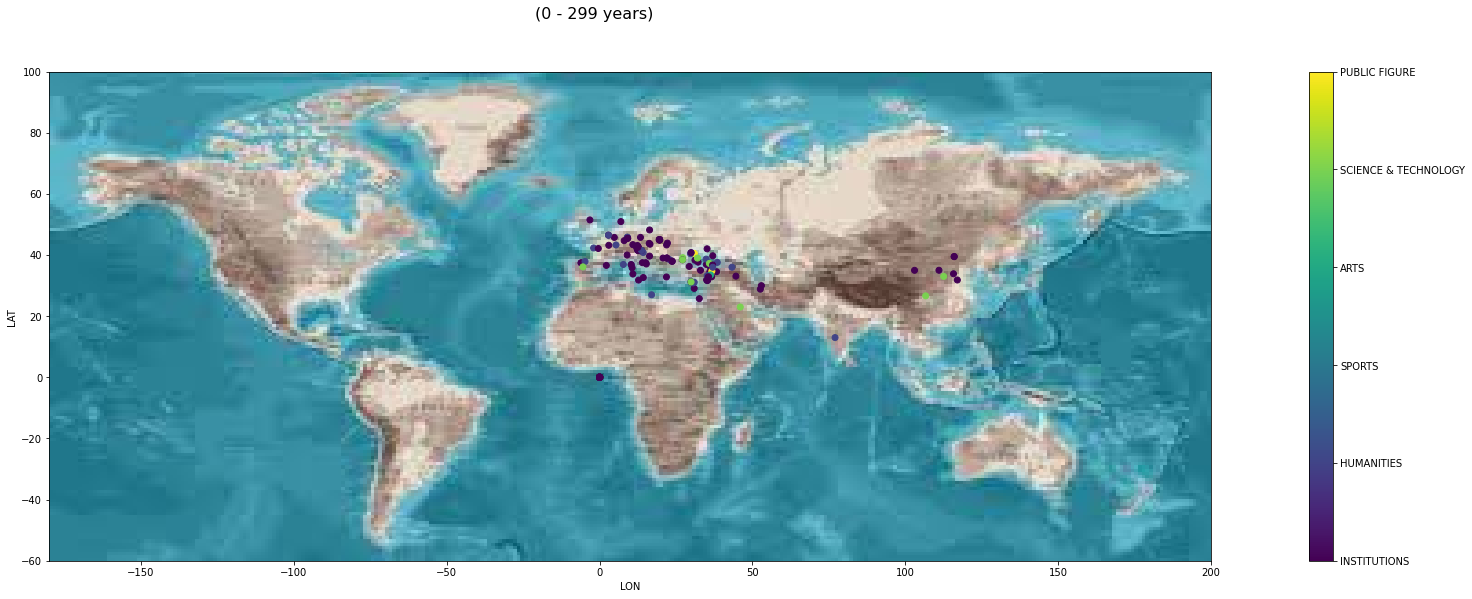

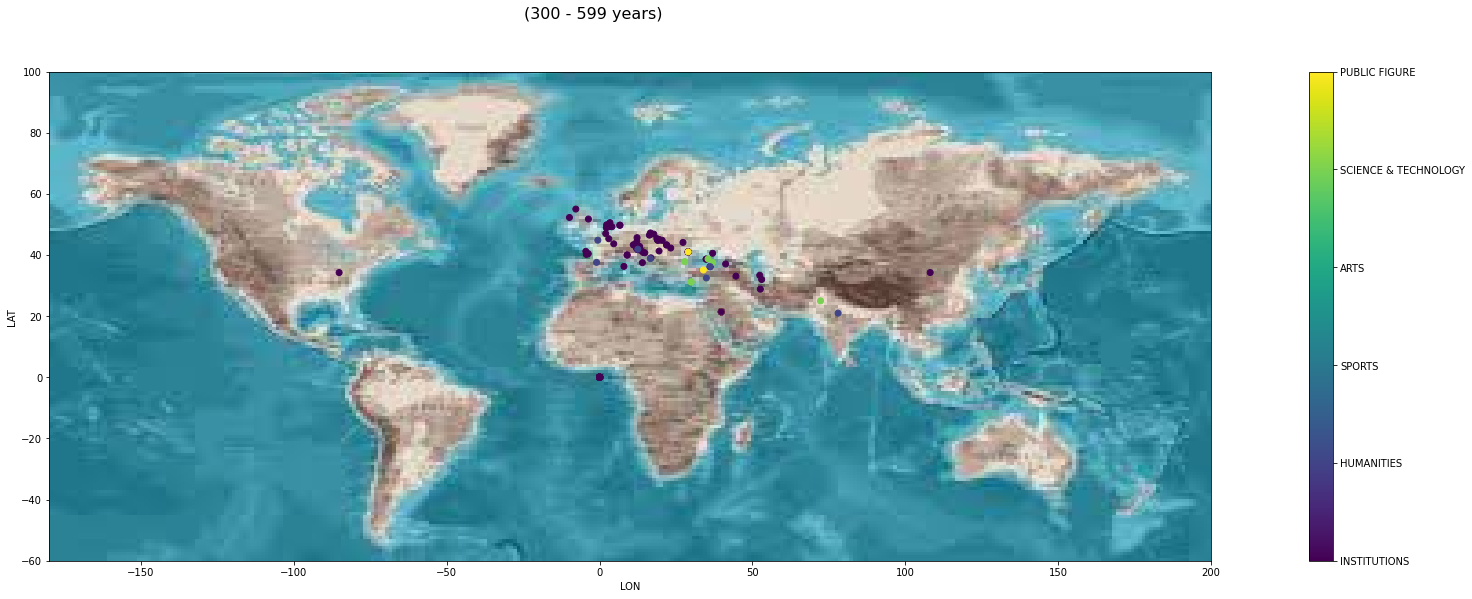

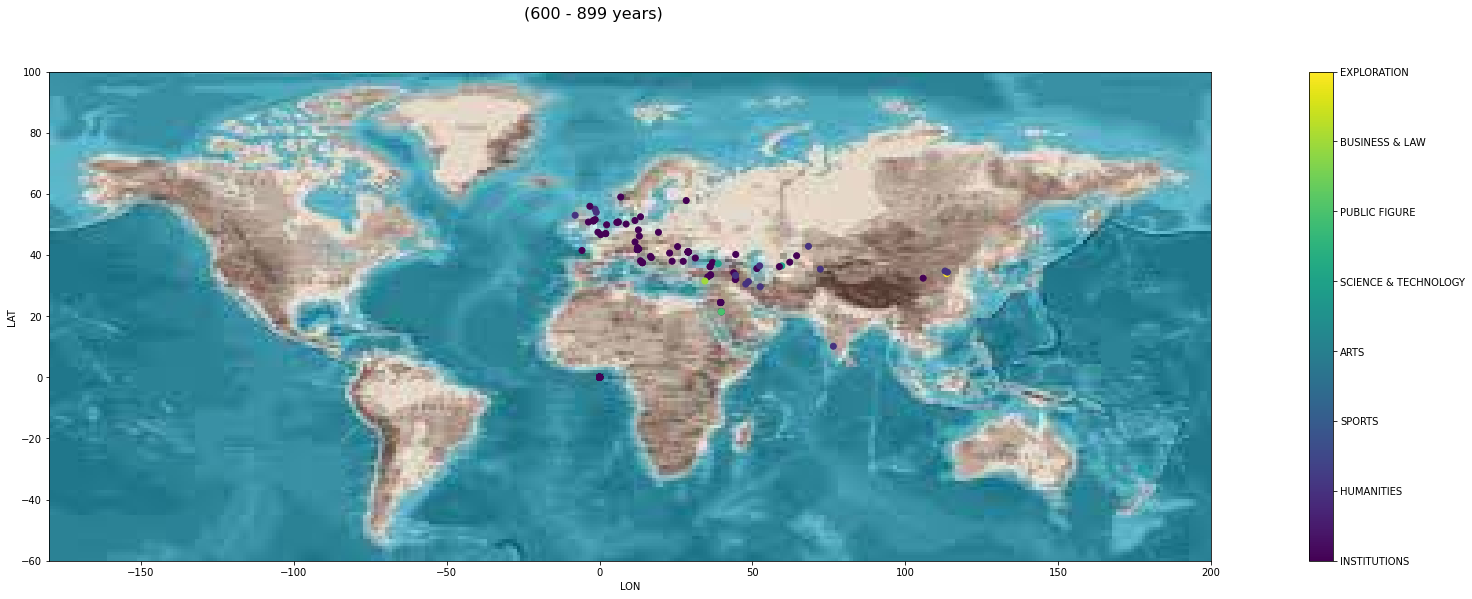

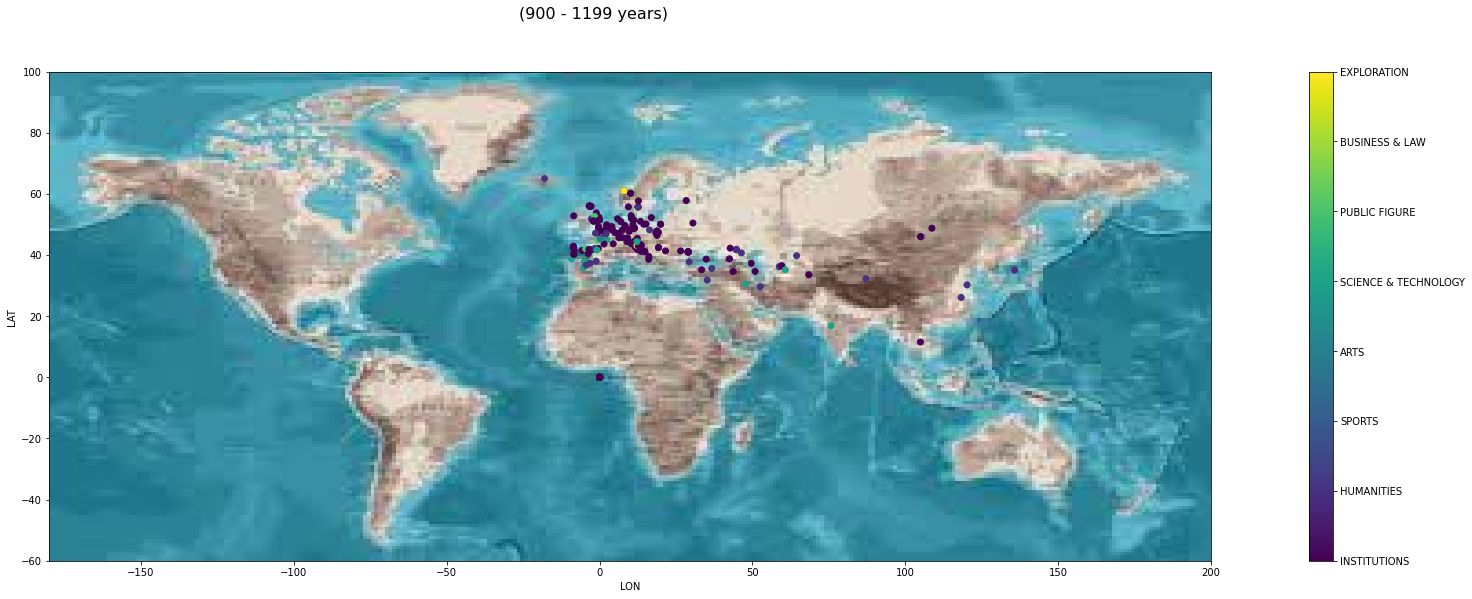

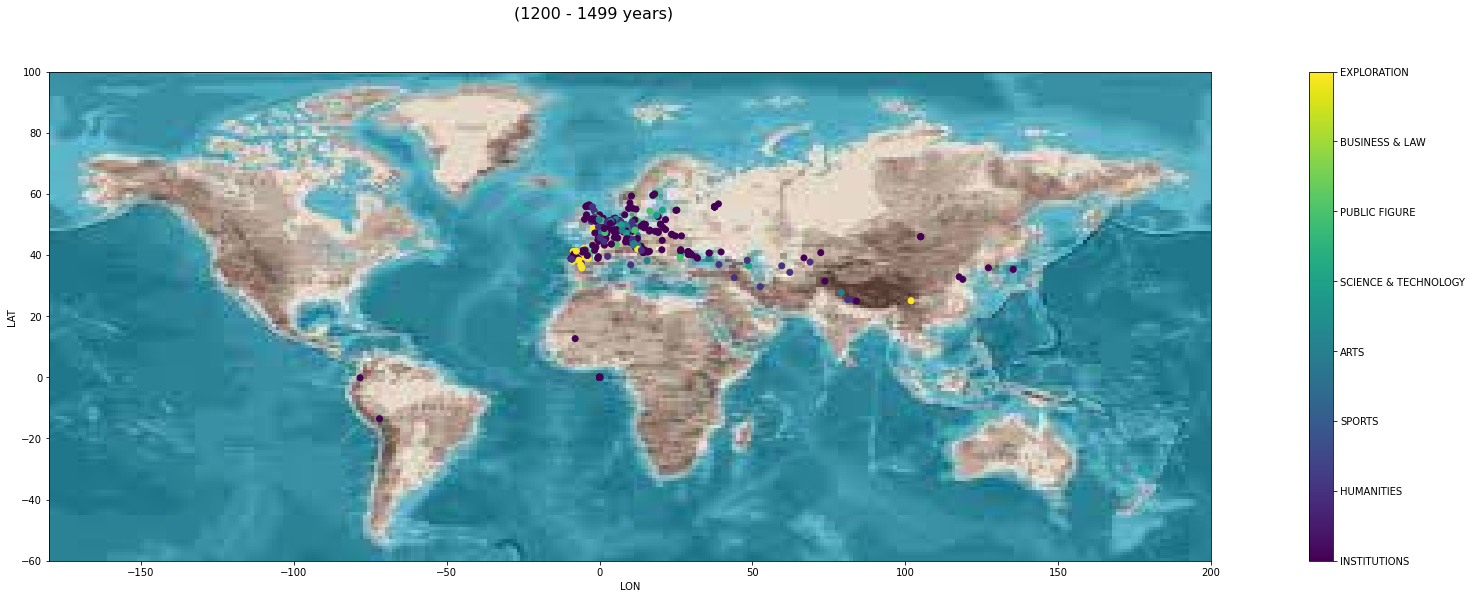

In [8]:
# PLOT OF PLANISPHERE FROM year 0 to year 1500, with interval of 3 centuries

interval = 300

for i in range(0,1500, interval):

    df['birthyear'].apply(int)
    df2 = df.loc[df['birthyear'] > i]
    df2 = df2.loc[df['birthyear'] <= i+interval-1]

    

    img = plt.imread("planisphere.jpg")
    fig, ax = plt.subplots(figsize=(35,9))
    fig.suptitle("({:d} - {:d} years)".format(i, i+interval-1), fontsize=16)
    ax.imshow(img, extent=[-180, 200, -60, 100])
    sc = ax.scatter(df2.LON, df2.LAT, c=df2.domain, cmap='viridis')
    fig.colorbar(sc, format=ticker.FuncFormatter(fmt_inst));
    plt.ylabel("LAT")
    plt.xlabel("LON")



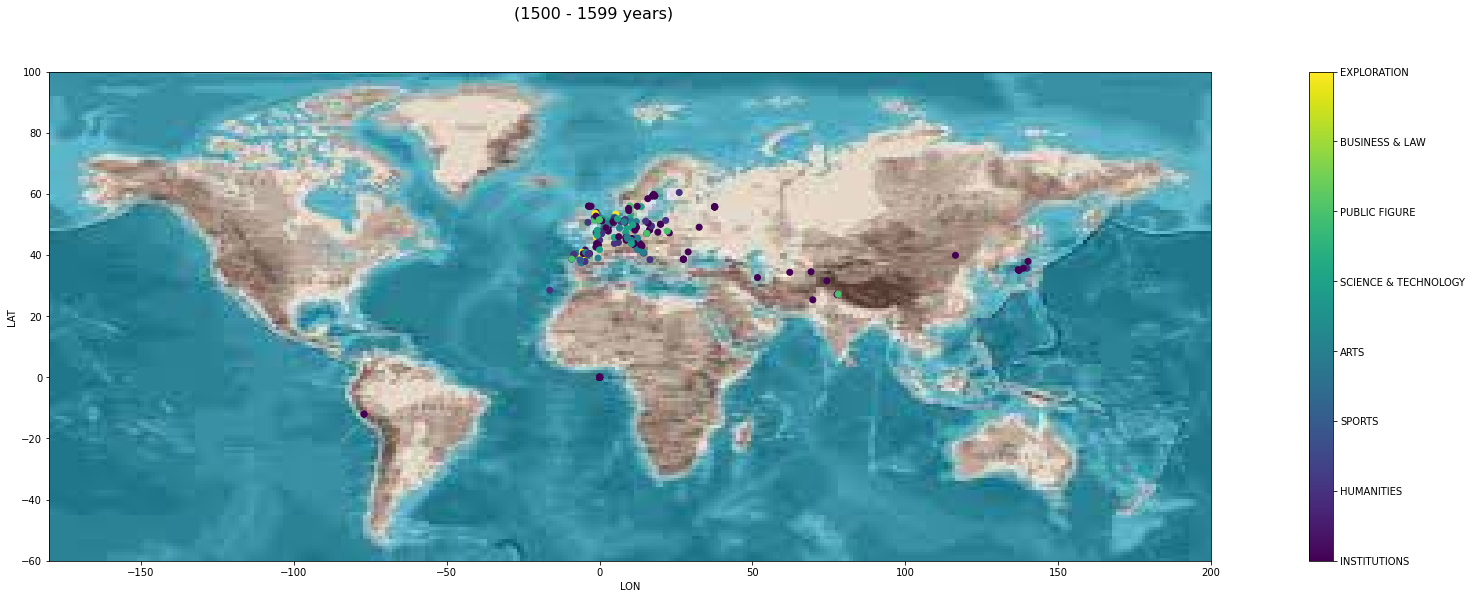

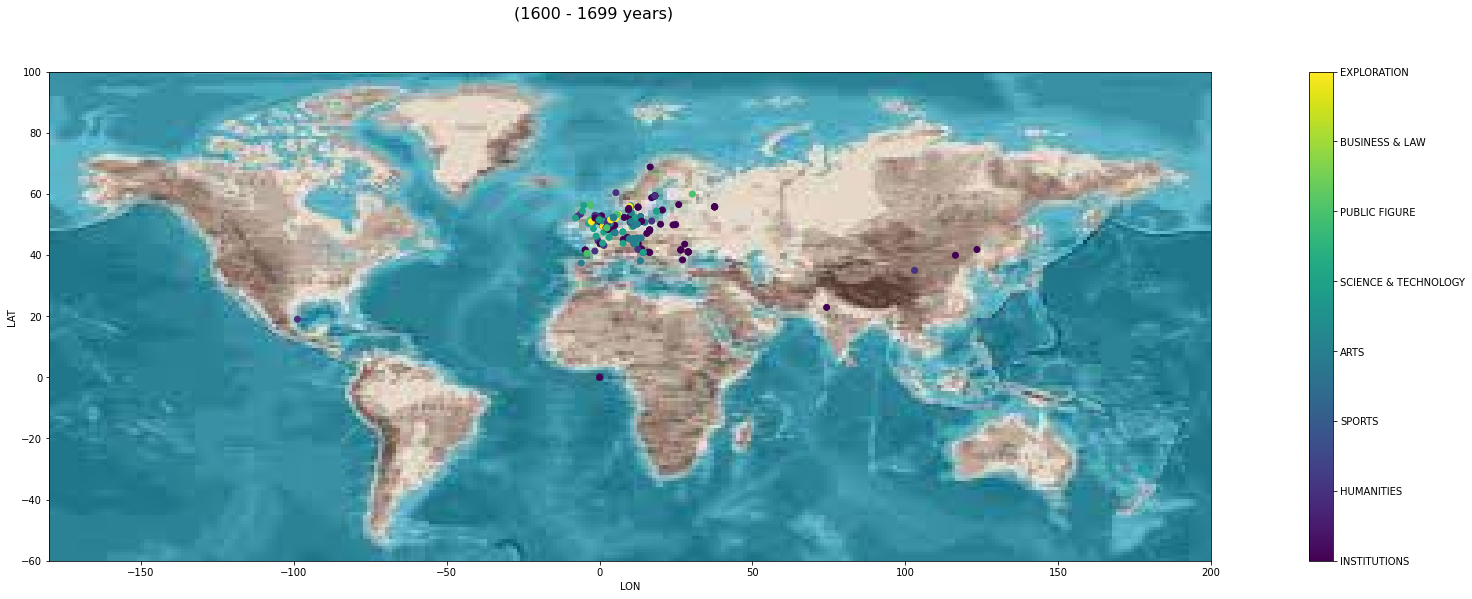

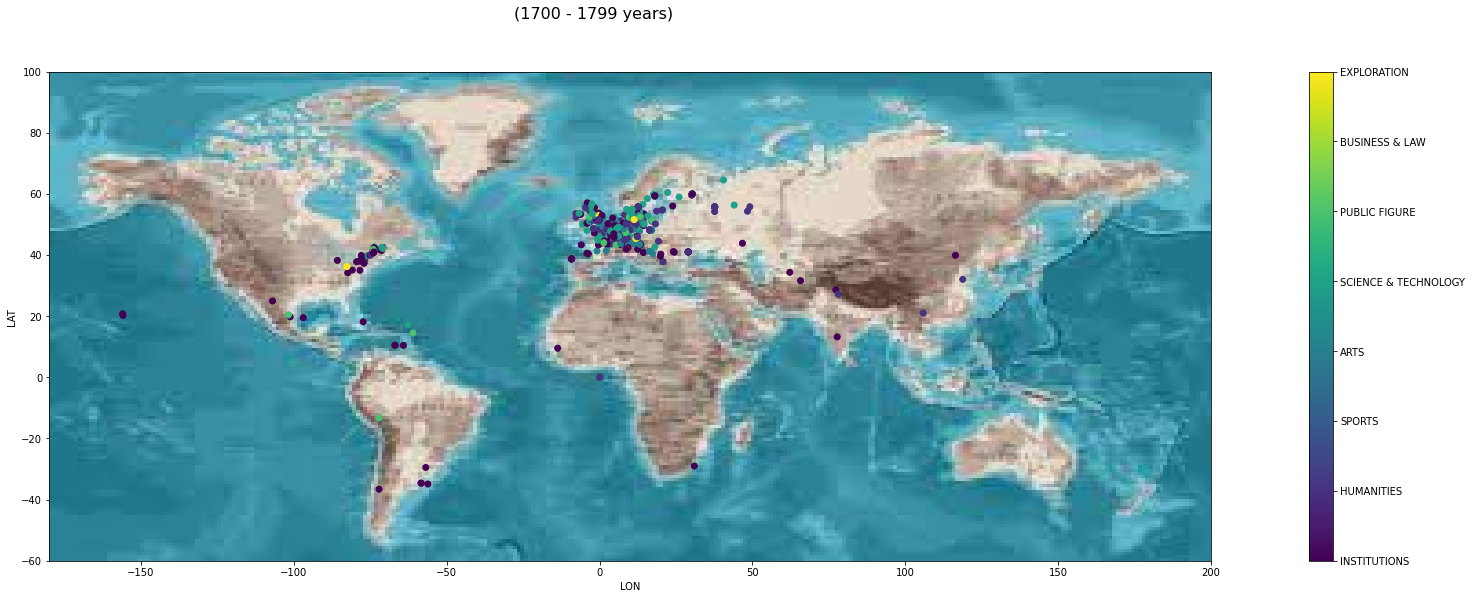

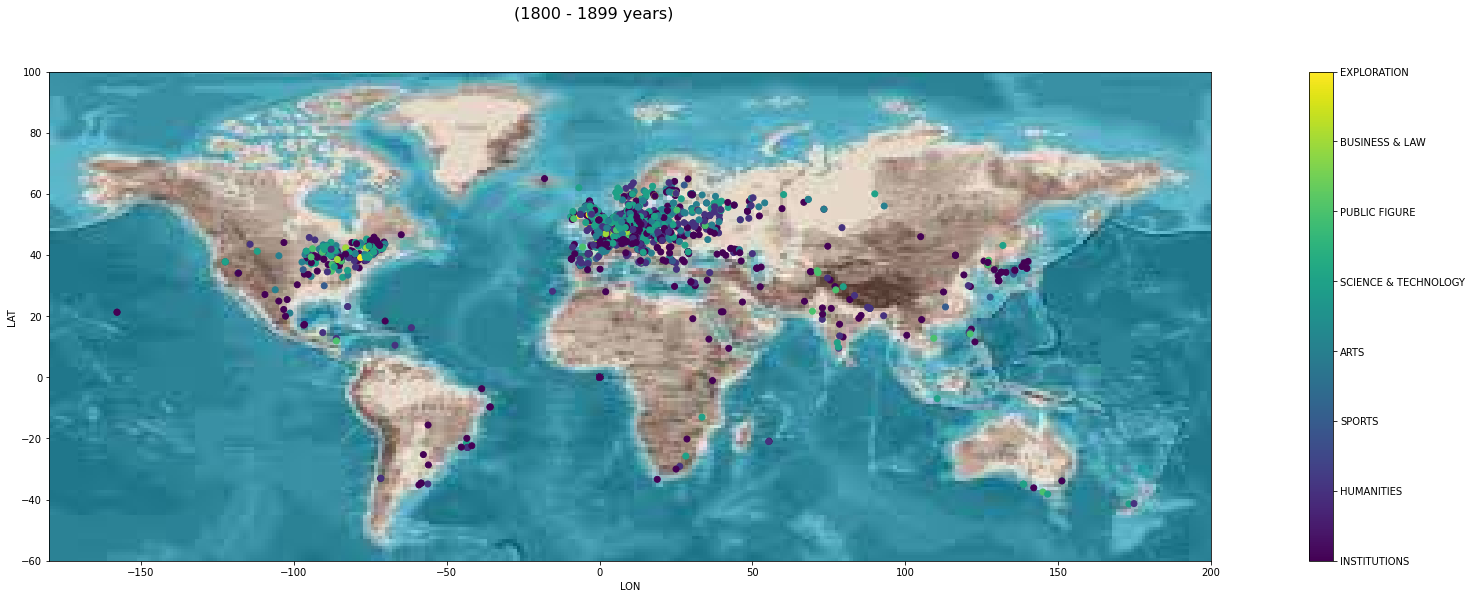

In [9]:
# PLOT OF PLANISPHERE FROM year 1500 to year 1900, with interval of 1 centuries

interval = 100

for i in range(1500,1900, interval):

    df['birthyear'].apply(int)
    df2 = df.loc[df['birthyear'] > i]
    df2 = df2.loc[df['birthyear'] <= i+interval-1]

    

    img = plt.imread("planisphere.jpg")
    fig, ax = plt.subplots(figsize=(35,9))
    fig.suptitle("({:d} - {:d} years)".format(i, i+interval-1), fontsize=16)
    ax.imshow(img, extent=[-180, 200, -60, 100])
    sc = ax.scatter(df2.LON, df2.LAT, c=df2.domain, cmap='viridis')
    fig.colorbar(sc, format=ticker.FuncFormatter(fmt_inst));
    plt.ylabel("LAT")
    plt.xlabel("LON")

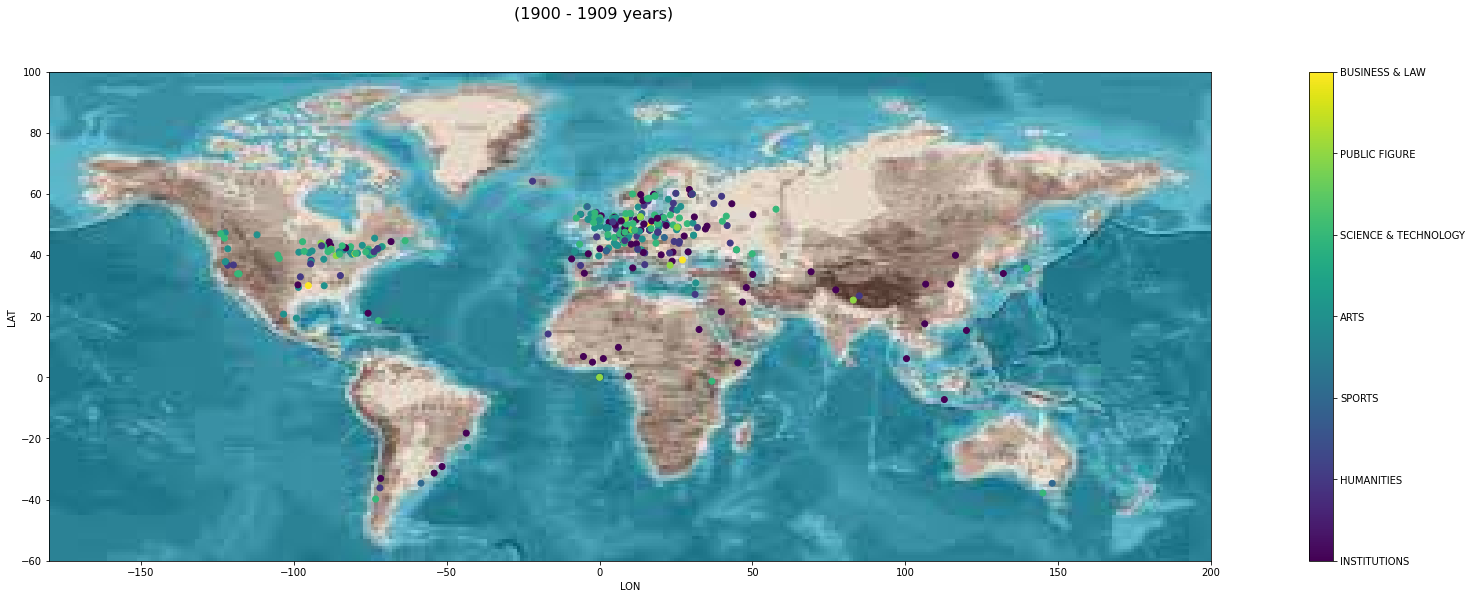

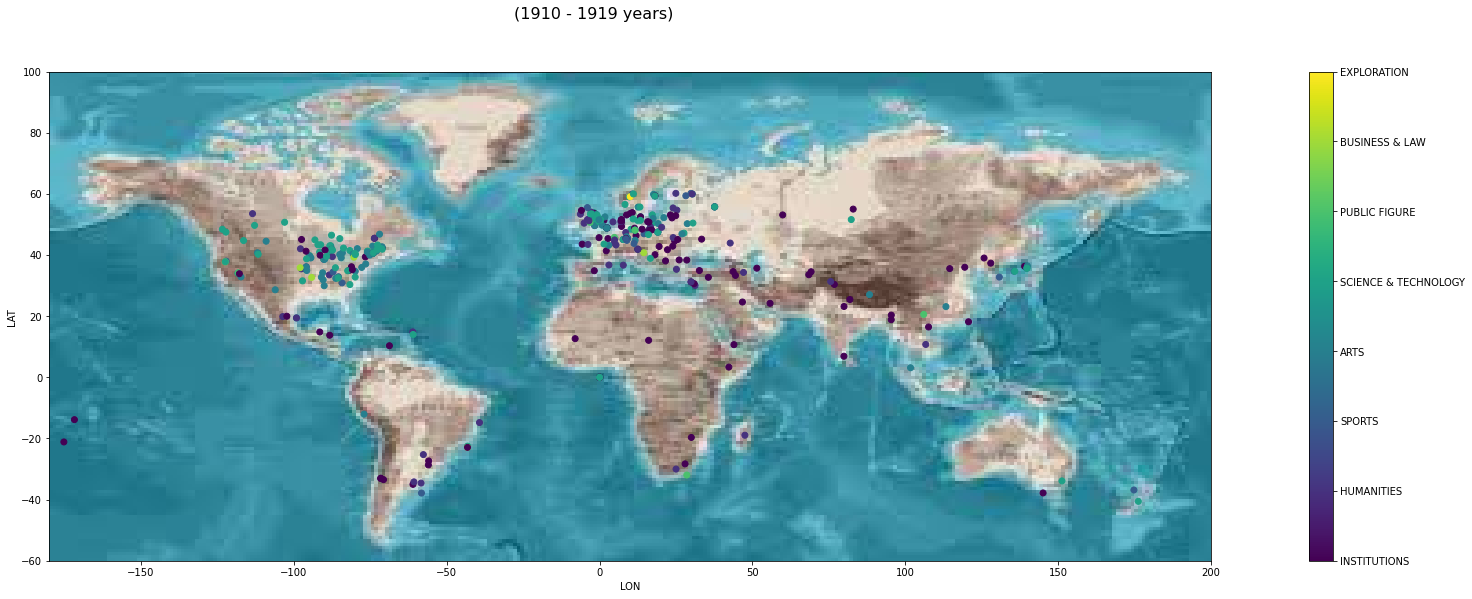

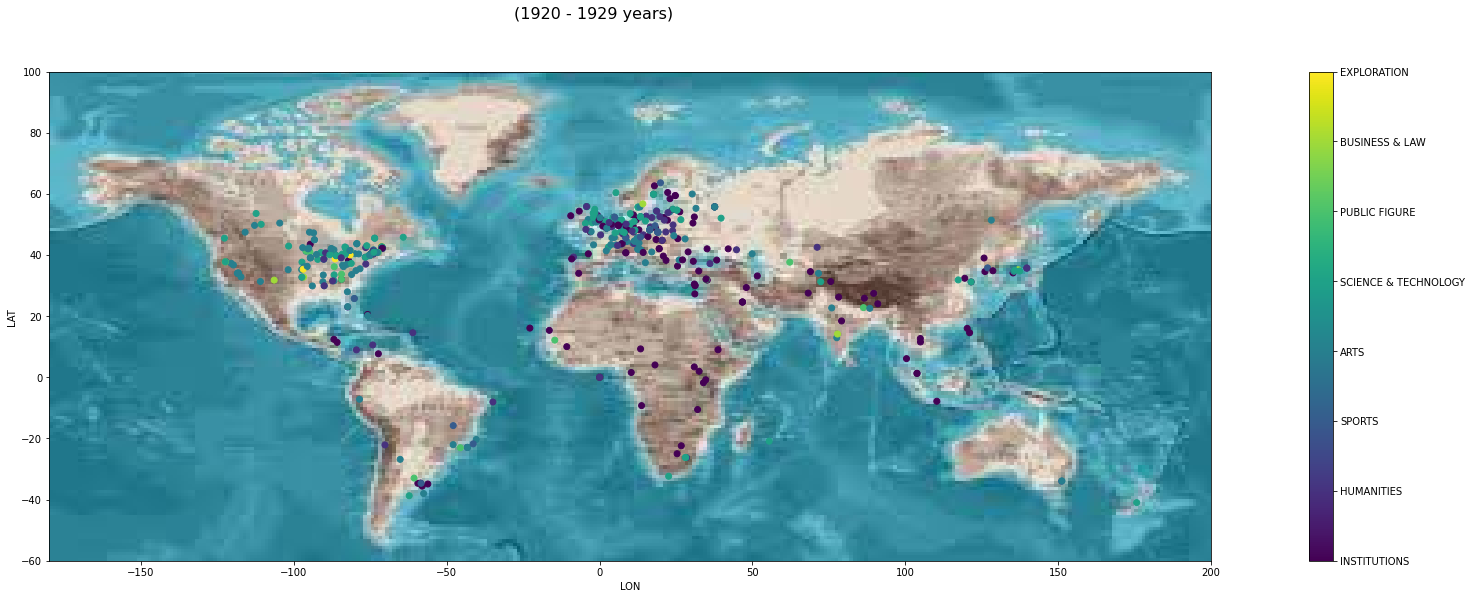

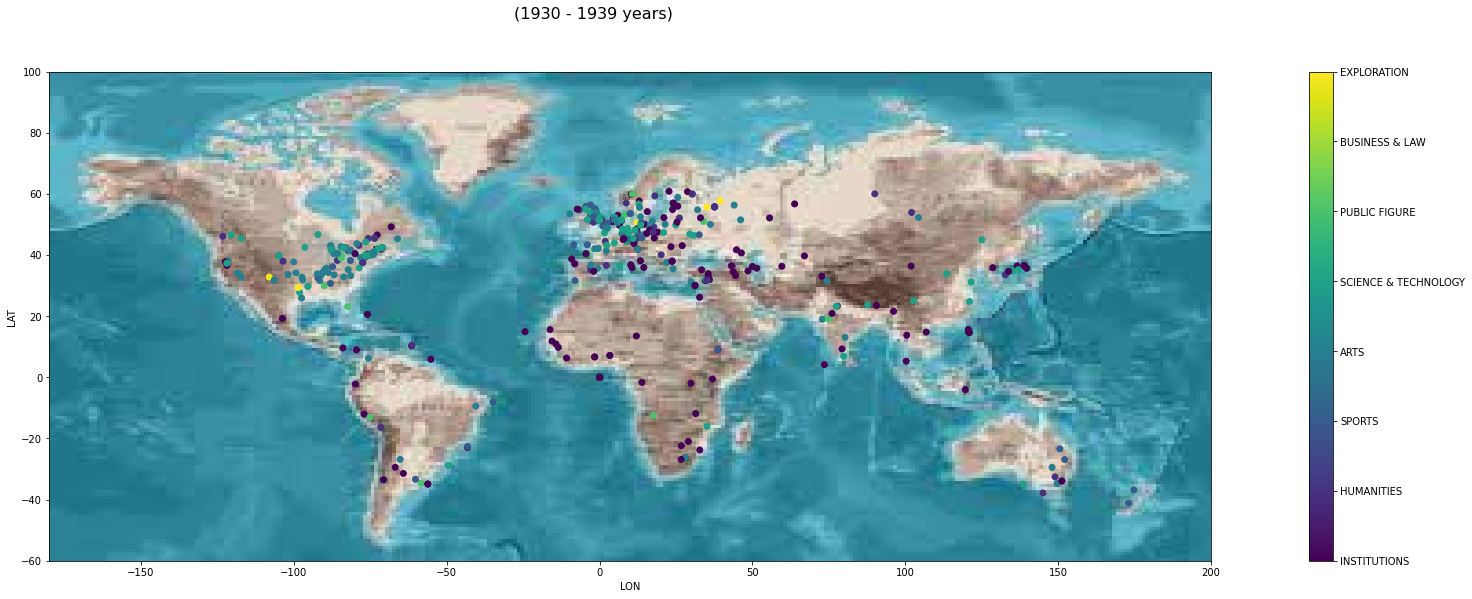

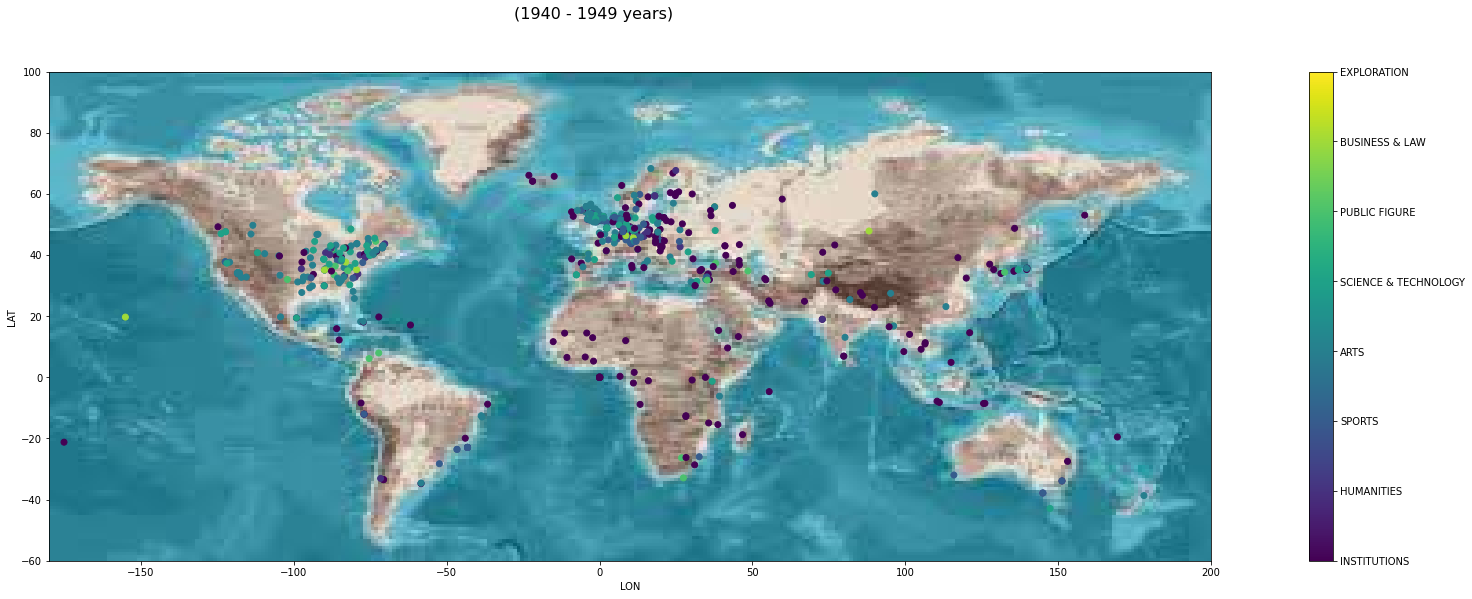

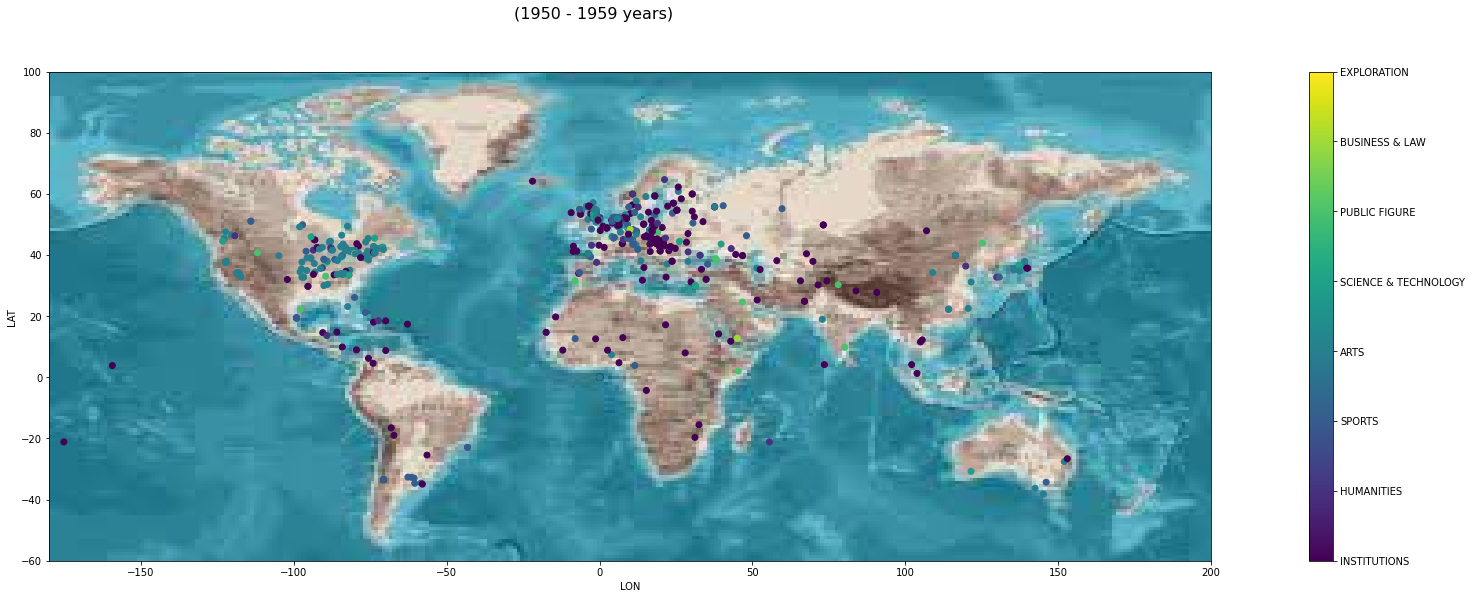

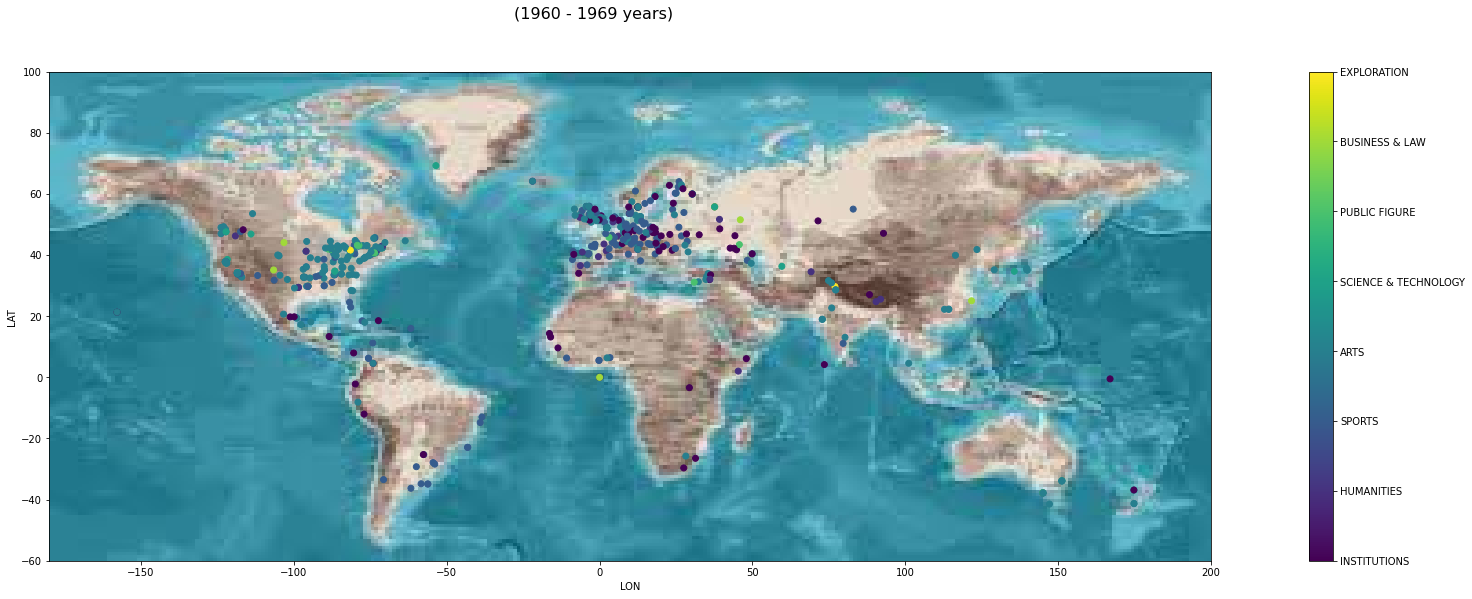

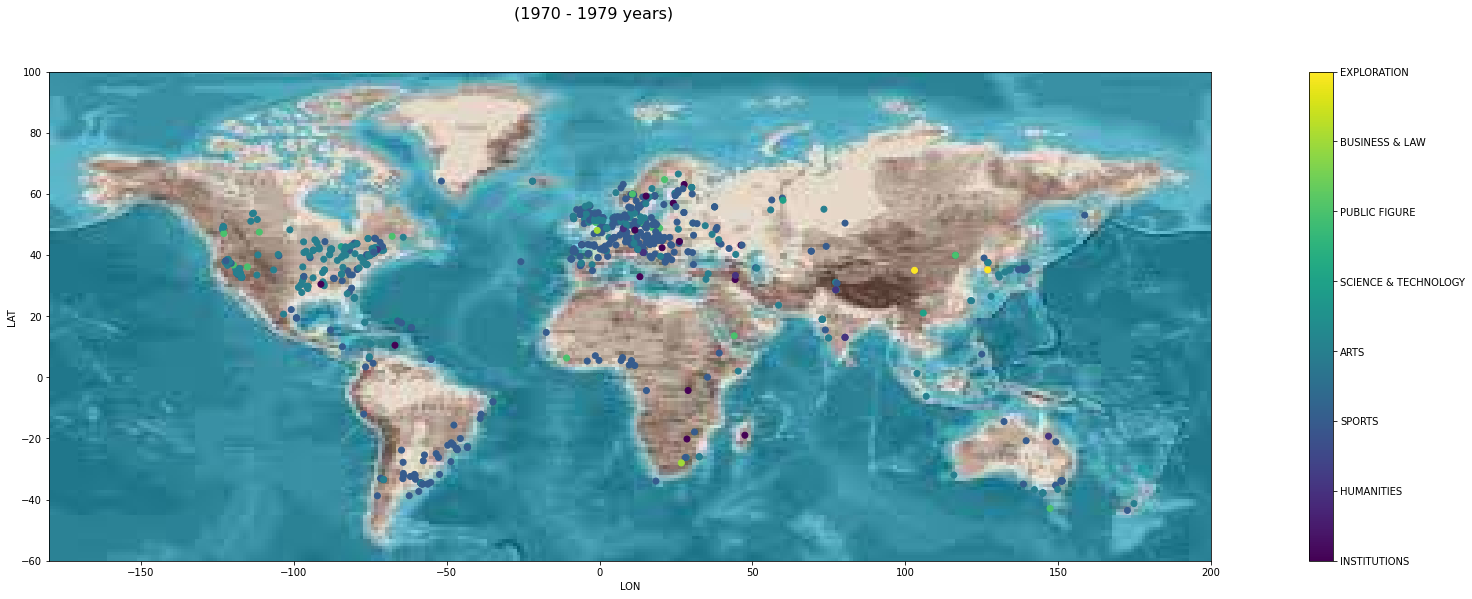

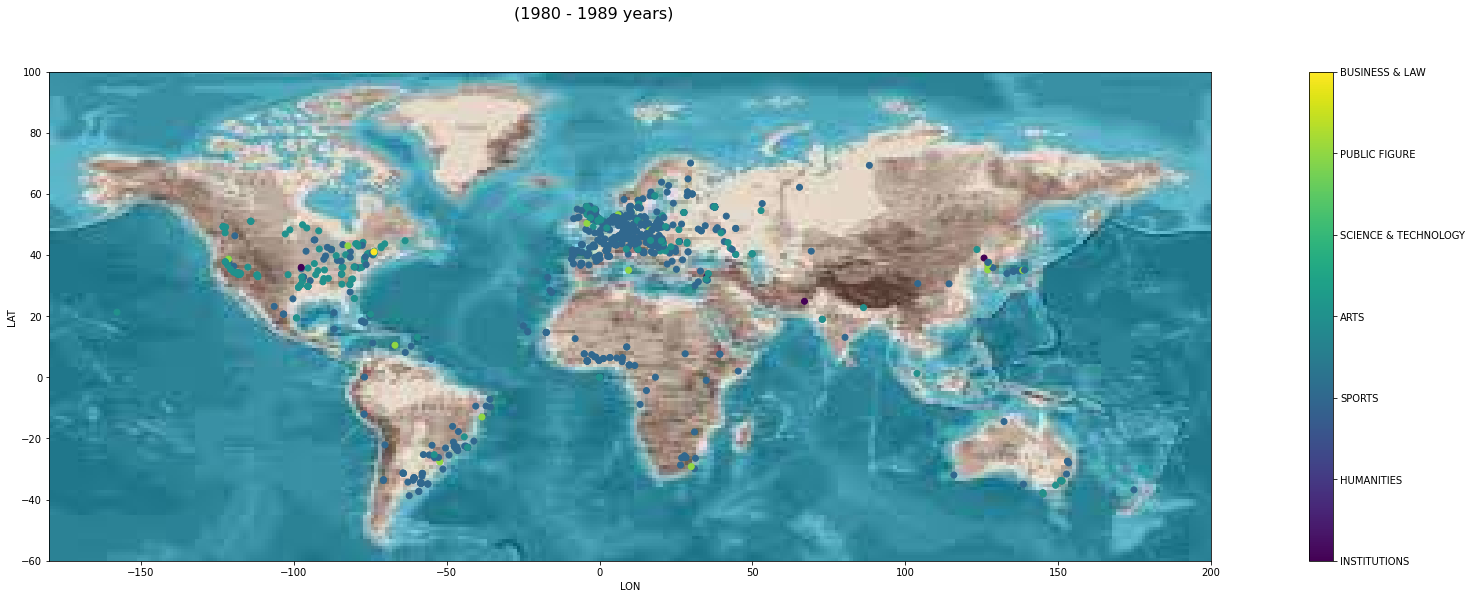

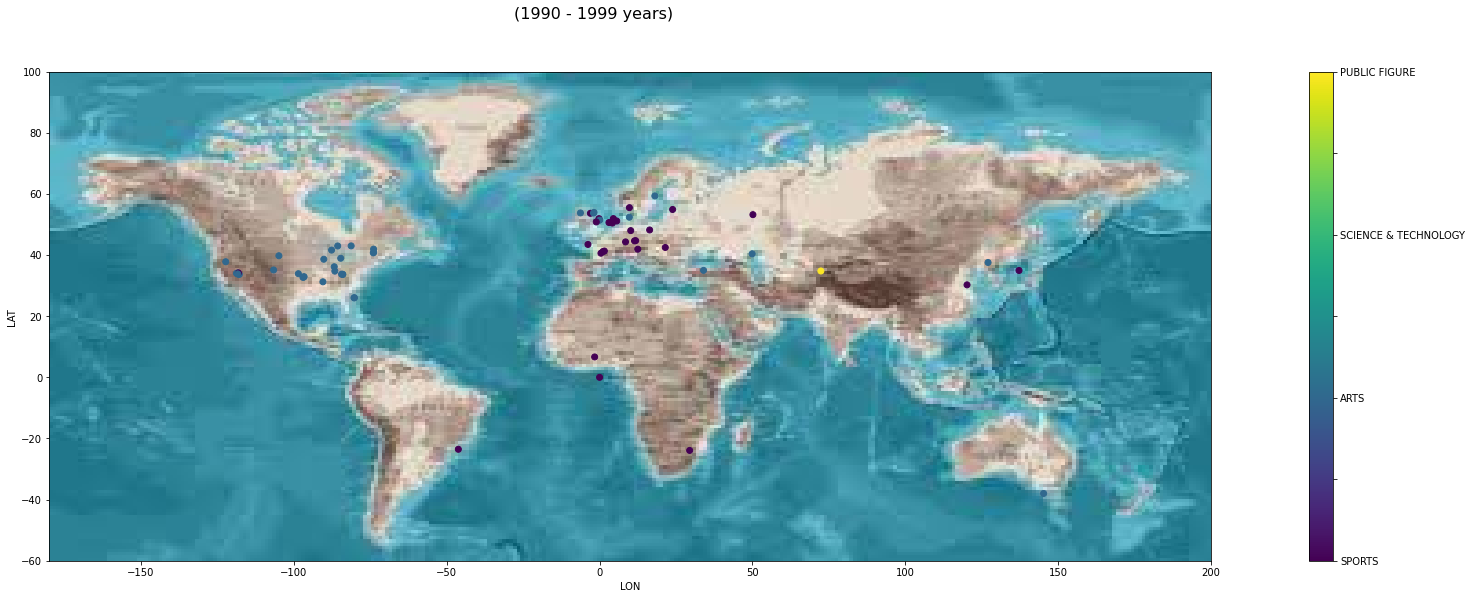

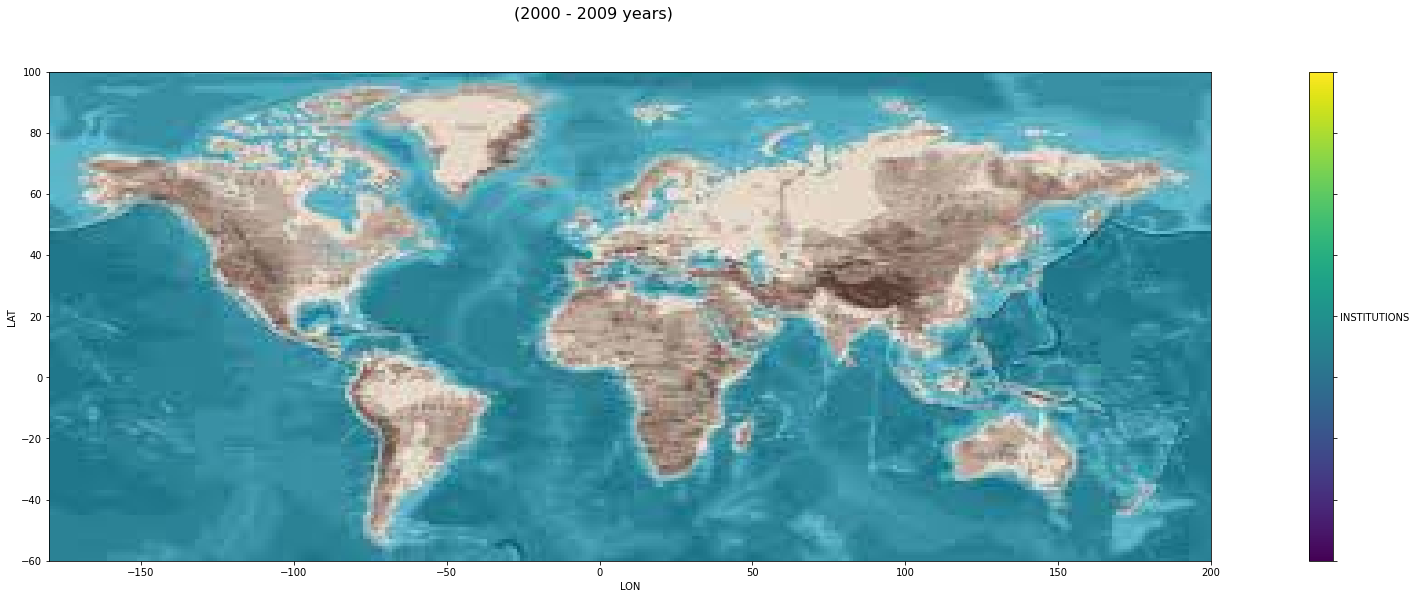

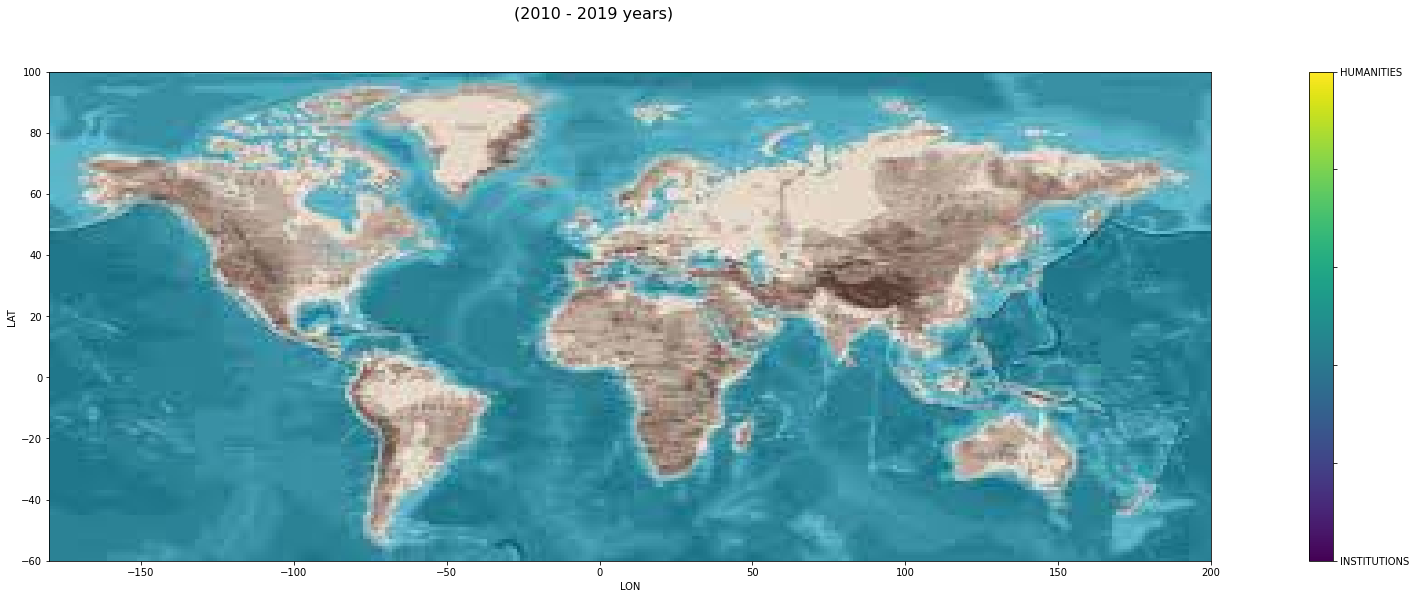

In [10]:
# PLOT OF PLANISPHERE FROM year 1900 to year 2020, with interval of 10 year

interval = 10

for i in range(1900,2020, interval):

    df['birthyear'].apply(int)
    df2 = df.loc[df['birthyear'] > i]
    df2 = df2.loc[df['birthyear'] <= i+interval-1]

    img = plt.imread("planisphere.jpg")
    fig, ax = plt.subplots(figsize=(35,9))
    fig.suptitle("({:d} - {:d} years)".format(i, i+interval-1), fontsize=16)
    ax.imshow(img, extent=[-180, 200, -60, 100])
    sc = ax.scatter(df2.LON, df2.LAT, c=df2.domain, cmap='viridis')
    fig.colorbar(sc, format=ticker.FuncFormatter(fmt_inst));
    plt.ylabel("LAT")
    plt.xlabel("LON")